Dans ce script, il y a l'entrainement des modèles servant à la classification en 4 classes.

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import scipy as sp
import sklearn.cluster
import tqdm
from scipy.stats import zscore, kstest, kruskal

In [3]:
path = r"C:\Users\ahmed\MFE project"    
df = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("Database_Global_AmpliconDT_TSV")>-1][0])).fillna(0)

df_test = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("Database_Global_Test_AmpliconDT_TSV")>-1][0])).fillna(0)

In [74]:
df_test[(df_test["classe"]=="NVA") & (df_test["OPT_percent"]<0.6)][["OPT_percent", "pred"]]

,OPT_percent,pred
52,0.540816,SOPT


<AxesSubplot:xlabel='classe', ylabel='OPT_percent'>

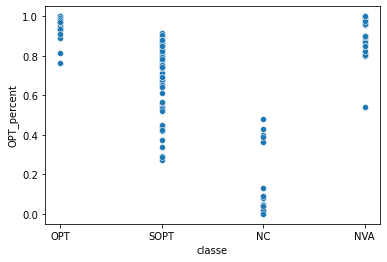

In [30]:
sns.scatterplot(data=df_test, y="OPT_percent", x="classe")

In [71]:
from sklearn.ensemble import RandomForestClassifier
from joblib import load

clf = load("RF_model_Global_train_saved.joblib")


pred = clf.predict(df_test[all_feat])
df_test.loc[:,"pred"]=pred

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
# confusion_matrix(df_test["classe"], pred, normalize= "true" , labels=["OPT", "NC", "SOPT", "NVA"])
f1_score(df_test["classe"], pred, labels = ["OPT", "NC", "SOPT", "NVA"], average = None)


array([0.95483871, 0.7804878 , 0.84955752, 0.98305085])

In [4]:
# toutes les variables
all_feat = ['gc_percent_mean', 'gc_percent_median',
       'gc_percent_0.3', 'gc_percent_0.5', 'gc_percent_0.7', 'gc_percent_0.9',
       'cov20_percent_mean', 'cov20_percent_median', 'cov20_percent_0.3',
       'cov20_percent_0.5', 'cov20_percent_0.7', 'cov20_percent_0.9',
       'cov100_percent_mean', 'cov100_percent_median', 'cov100_percent_0.3',
       'cov100_percent_0.5', 'cov100_percent_0.7', 'cov100_percent_0.9',
       'cov500_percent_mean', 'cov500_percent_median', 'cov500_percent_0.3',
       'cov500_percent_0.5', 'cov500_percent_0.7', 'cov500_percent_0.9',
       'fwd_e2e_percent_mean', 'fwd_e2e_percent_median', 'fwd_e2e_percent_0.3',
       'fwd_e2e_percent_0.5', 'fwd_e2e_percent_0.7', 'fwd_e2e_percent_0.9',
       'rev_e2e_percent_mean', 'rev_e2e_percent_median', 'rev_e2e_percent_0.3',
       'rev_e2e_percent_0.5', 'rev_e2e_percent_0.7', 'rev_e2e_percent_0.9', 'longueur', 'OPT_percent',
       'Frequency_norm_mean', 'Frequency_norm_median', 'Frequency_norm_0.3',
       'Frequency_norm_0.5', 'Frequency_norm_0.7', 'Frequency_norm_0.9',
       'Quality_norm_mean', 'Quality_norm_median', 'Quality_norm_0.3',
       'Quality_norm_0.5', 'Quality_norm_0.7', 'Quality_norm_0.9',
       'Coverage_norm_mean', 'Coverage_norm_median', 'Coverage_norm_0.3',
       'Coverage_norm_0.5', 'Coverage_norm_0.7', 'Coverage_norm_0.9',
       'Allele Cov_norm_mean', 'Allele Cov_norm_median', 'Allele Cov_norm_0.3',
       'Allele Cov_norm_0.5', 'Allele Cov_norm_0.7', 'Allele Cov_norm_0.9',
       'longueur_norm_mean', 'longueur_norm_median', 'longueur_norm_0.3',
       'longueur_norm_0.5', 'longueur_norm_0.7', 'longueur_norm_0.9']

In [5]:
df_input = df[all_feat]

In [80]:
#feature selection RFE (25 features)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
estim = RandomForestClassifier(n_estimators=50)
rfe = RFE(estim, n_features_to_select=25, step=1)
rfe = rfe.fit(df[all_feat].fillna(0), df["classe"])

feat_imp = pd.concat([pd.DataFrame(rfe.support_, columns=["imp"]),pd.DataFrame(all_feat, columns=["feat"])], axis=1)


In [81]:
feat_rfe = feat_imp[feat_imp["imp"]==True]["feat"].values

In [82]:
feat_rfe

array(['cov500_percent_mean', 'cov500_percent_0.3', 'cov500_percent_0.5',
       'cov500_percent_0.7', 'cov500_percent_0.9', 'OPT_percent',
       'Frequency_norm_mean', 'Frequency_norm_median',
       'Frequency_norm_0.3', 'Frequency_norm_0.5', 'Quality_norm_mean',
       'Quality_norm_median', 'Quality_norm_0.3', 'Coverage_norm_mean',
       'Coverage_norm_median', 'Coverage_norm_0.3', 'Coverage_norm_0.5',
       'Coverage_norm_0.7', 'Coverage_norm_0.9', 'Allele Cov_norm_mean',
       'Allele Cov_norm_median', 'Allele Cov_norm_0.3',
       'Allele Cov_norm_0.5', 'longueur_norm_mean',
       'longueur_norm_median'], dtype=object)

In [62]:
df_input = df[feat_rfe]

In [12]:
#Features selection. pour correl pearson >0.9
df_input = df[['gc_percent_mean', 'gc_percent_0.7',
       'cov20_percent_mean', 'cov20_percent_median', 'cov100_percent_mean',
       'fwd_e2e_percent_mean', 'fwd_e2e_percent_median', 'fwd_e2e_percent_0.3',
       'fwd_e2e_percent_0.9', 'OPT_percent', 'longueur',
       'Frequency_norm_mean', 'Frequency_norm_0.7',
       'Quality_norm_mean', 'Quality_norm_0.7', 'Quality_norm_0.9',
       'Coverage_norm_mean','Coverage_norm_0.9',
       'longueur_norm_mean', 'longueur_norm_0.3',
       'longueur_norm_0.5', 'longueur_norm_0.7']].fillna(0)

In [25]:
#Features selection. pour correl Spearman >0.9
df_input = df[['gc_percent_mean',
       'gc_percent_0.3', 'gc_percent_0.5', 'gc_percent_0.9',
       'cov20_percent_mean', 'cov20_percent_median', 'cov100_percent_mean', 'cov100_percent_median',
       'cov500_percent_median', 'fwd_e2e_percent_mean', 'fwd_e2e_percent_median', 'fwd_e2e_percent_0.3',
       'fwd_e2e_percent_0.5', 'fwd_e2e_percent_0.7', 'fwd_e2e_percent_0.9',
       'rev_e2e_percent_mean', 'rev_e2e_percent_0.3',
       'rev_e2e_percent_0.5', 'rev_e2e_percent_0.7', 'rev_e2e_percent_0.9', 'longueur', 'OPT_percent',
       'Frequency_norm_mean', 'Frequency_norm_0.3',
       'Quality_norm_mean',
       'Quality_norm_0.5', 'Quality_norm_0.7', 'Quality_norm_0.9',
       'Coverage_norm_mean',
       'longueur_norm_mean', 'longueur_norm_0.3',
       'longueur_norm_0.5', 'longueur_norm_0.7', 'longueur_norm_0.9']].fillna(0)

In [14]:
#features selection. Random Forest feature importance (25 features)
feat_RF = ['OPT_percent', 'Coverage_norm_mean', 'cov500_percent_mean',
       'cov500_percent_0.5', 'cov500_percent_0.3', 'cov500_percent_0.9',
       'cov500_percent_0.7', 'Coverage_norm_median', 'longueur_norm_median',
       'Quality_norm_median', 'Frequency_norm_mean', 'longueur_norm_mean',
       'Coverage_norm_0.5', 'Quality_norm_0.3', 'Frequency_norm_median',
       'Allele Cov_norm_mean', 'Allele Cov_norm_0.3', 'Coverage_norm_0.7',
       'Frequency_norm_0.3', 'Allele Cov_norm_median', 'Coverage_norm_0.3',
       'Quality_norm_mean', 'cov100_percent_0.9', 'Allele Cov_norm_0.7',
       'cov500_percent_median']

df_input = df[['OPT_percent', 'Coverage_norm_mean', 'cov500_percent_mean',
       'cov500_percent_0.5', 'cov500_percent_0.3', 'cov500_percent_0.9',
       'cov500_percent_0.7', 'Coverage_norm_median', 'longueur_norm_median',
       'Quality_norm_median', 'Frequency_norm_mean', 'longueur_norm_mean',
       'Coverage_norm_0.5', 'Quality_norm_0.3', 'Frequency_norm_median',
       'Allele Cov_norm_mean', 'Allele Cov_norm_0.3', 'Coverage_norm_0.7',
       'Frequency_norm_0.3', 'Allele Cov_norm_median', 'Coverage_norm_0.3',
       'Quality_norm_mean', 'cov100_percent_0.9', 'Allele Cov_norm_0.7',
       'cov500_percent_median']]

In [6]:
df_output = df["classe"]

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.5)

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 50)

clf.fit(df[all_feat], df_output)

RandomForestClassifier(n_estimators=50)

In [8]:
pred = clf.predict(df_test[all_feat])

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
ks = [2, 5, 10, 20, 30]

scores=[]
for k in ks:
    clf =RandomForestClassifier(n_estimators= 50, min_samples_split=k)    
    scores += [cross_val_score(clf, df[all_feat], df_output, cv=5)]

In [19]:
[np.array(i).mean() for i in scores]

[0.9495123350545036,
 0.9471026965002869,
 0.9471026965002869,
 0.9399024670109007,
 0.935083189902467]

In [9]:
clf.predict_proba(df_test[all_feat])

array([[0.  , 0.04, 0.96, 0.  ],
       [0.  , 0.08, 0.66, 0.26],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.54, 0.06, 0.  , 0.4 ],
       [0.  , 0.04, 0.96, 0.  ],
       [0.  , 0.04, 0.96, 0.  ],
       [0.04, 0.02, 0.12, 0.82],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.86, 0.  , 0.14],
       [0.  , 0.  , 1.  , 0.  ],
       [0.96, 0.  , 0.  , 0.04],
       [0.  , 0.88, 0.  , 0.12],
       [0.  , 0.  , 1.  , 0.  ],
       [0.02, 0.82, 0.02, 0.14],
       [0.  , 0.02, 0.9 , 0.08],
       [0.  , 0.04, 0.96, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.02, 0.74, 0.04, 0.2 ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.04, 0.  , 0.06, 0.9 ],
       [0.  , 0.02, 0.92, 0.06],
       [0.2 , 0.  , 0.  , 0.8 ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.72, 0.06, 0.22],
       [0.14, 0.  , 0.  , 0.86],
       [1.  , 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , 0.96],
       [0.

In [27]:
from joblib import dump, load
# dump(clf, 'RF_model_PCA_Global_train_saved.joblib')
# dump(pca, "pca_transform_train.joblib")
dump(clf, "RF_featselect_Spearman.joblib")

['RF_featselect_Spearman.joblib']

In [69]:
pred = clf.predict(df_test[feat_rfe])

In [88]:
predi2 = clf.predict(df_test[['cov100_percent_0.9', 'cov500_percent_mean', 'cov500_percent_0.3',
       'cov500_percent_0.5', 'cov500_percent_0.7', 'cov500_percent_0.9',
       'OPT_percent', 'Frequency_norm_mean', 'Frequency_norm_median',
       'Frequency_norm_0.3', 'Frequency_norm_0.5', 'Quality_norm_mean',
       'Quality_norm_median', 'Quality_norm_0.3', 'Coverage_norm_mean',
       'Coverage_norm_median', 'Coverage_norm_0.3', 'Coverage_norm_0.5',
       'Coverage_norm_0.7', 'Coverage_norm_0.9', 'Allele Cov_norm_mean',
       'Allele Cov_norm_median', 'Allele Cov_norm_0.9',
       'longueur_norm_mean', 'longueur_norm_median']])

In [76]:
df_test.loc[:, "pred_rfe_feat"] = pred

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_test["classe"], pred, normalize="true", labels=["OPT", "NC", "SOPT", "NVA"])

array([[0.90123457, 0.        , 0.09876543, 0.        ],
       [0.        , 0.68181818, 0.31818182, 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.06666667, 0.93333333]])

In [74]:
#nouveau
confusion_matrix(df_test["classe"], pred, normalize="true", labels=["OPT", "NC", "SOPT", "NVA"])

array([[0.95061728, 0.        , 0.04938272, 0.        ],
       [0.        , 0.81818182, 0.18181818, 0.        ],
       [0.01960784, 0.07843137, 0.90196078, 0.        ],
       [0.        , 0.        , 0.06666667, 0.93333333]])

In [53]:
confusion_matrix(df_test["classe"], pred, labels=["OPT", "NC", "SOPT", "NVA"])

array([[73,  0,  8,  0],
       [ 0, 15,  7,  0],
       [ 0,  0, 51,  0],
       [ 0,  0,  2, 28]], dtype=int64)

In [72]:
#nouveau
confusion_matrix(df_test["classe"], pred, labels=["OPT", "NC", "SOPT", "NVA"])

array([[77,  0,  4,  0],
       [ 0, 18,  4,  0],
       [ 1,  4, 46,  0],
       [ 0,  0,  2, 28]], dtype=int64)

In [77]:
#nouveau
from sklearn.metrics import f1_score
f1_score(df_test["classe"], df_test["pred_rfe_feat"], labels = ["OPT", "NC", "SOPT", "NVA"], average = None)

array([0.96855346, 0.81818182, 0.85981308, 0.96551724])

In [78]:
RF_global_RFE = load("RF_featselect_RFE.joblib")

In [83]:
predi = RF_global_RFE.predict(df_test[['cov100_percent_0.9', 'cov500_percent_mean', 'cov500_percent_0.3',
       'cov500_percent_0.5', 'cov500_percent_0.7', 'cov500_percent_0.9',
       'OPT_percent', 'Frequency_norm_mean', 'Frequency_norm_median',
       'Frequency_norm_0.3', 'Frequency_norm_0.5', 'Quality_norm_mean',
       'Quality_norm_median', 'Quality_norm_0.3', 'Coverage_norm_mean',
       'Coverage_norm_median', 'Coverage_norm_0.3', 'Coverage_norm_0.5',
       'Coverage_norm_0.7', 'Coverage_norm_0.9', 'Allele Cov_norm_mean',
       'Allele Cov_norm_median', 'Allele Cov_norm_0.9',
       'longueur_norm_mean', 'longueur_norm_median']])

In [86]:
confusion_matrix(df_test["classe"], predi, labels=["OPT", "NC", "SOPT", "NVA"])

array([[74,  0,  7,  0],
       [ 0, 15,  7,  0],
       [ 0,  0, 51,  0],
       [ 0,  0,  2, 28]], dtype=int64)

In [84]:
f1_score(df_test["classe"], predi, labels = ["OPT", "NC", "SOPT", "NVA"], average = None)

array([0.95483871, 0.81081081, 0.86440678, 0.96551724])

In [89]:
confusion_matrix(df_test["classe"], predi2, labels=["OPT", "NC", "SOPT", "NVA"])

array([[77,  0,  4,  0],
       [ 0, 18,  4,  0],
       [ 1,  5, 45,  0],
       [ 1,  0,  2, 27]], dtype=int64)

In [90]:
f1_score(df_test["classe"], predi2, labels = ["OPT", "NC", "SOPT", "NVA"], average = None)

array([0.9625    , 0.8       , 0.8490566 , 0.94736842])